In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import random
from IPython.display import clear_output

matplotlib.rcParams['figure.figsize'] = (8, 4)

## Построить сеть, предсказывающую следующую функцию:
$y=sin(x)$

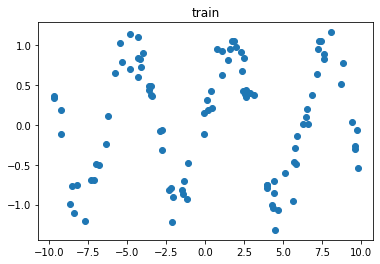

Text(0.5, 1.0, 'validation')

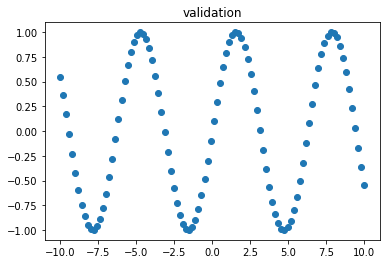

In [2]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0
y_train = torch.sin(x_train)
noise = torch.randn(y_train.shape) / 5
y_train = y_train + noise

x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)

x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('train')
plt.show()
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('validation')

In [3]:
def MSE(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

In [4]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

MSE 0.5241636633872986


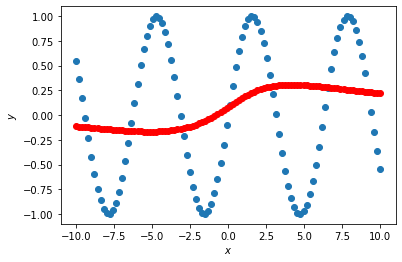

MSE 0.1902707815170288


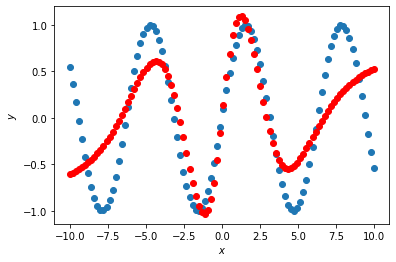

MSE 0.097964346408844


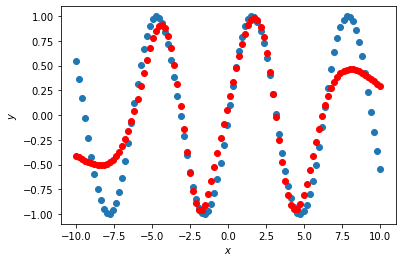

MSE 0.05867273733019829


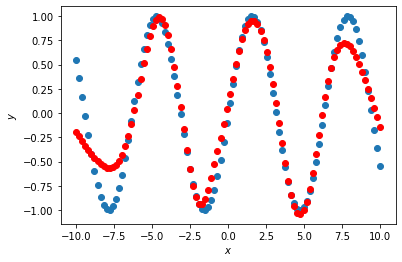

MSE 0.03904028236865997


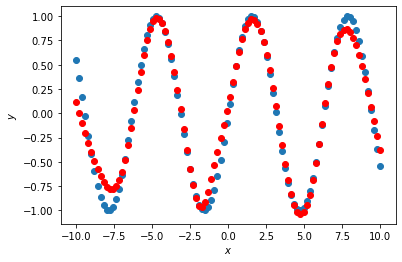

MSE 0.031837597489356995


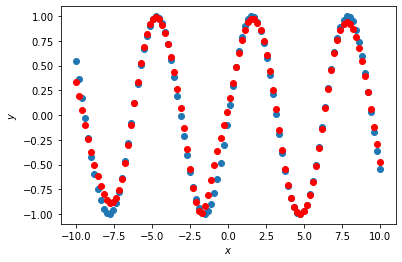

MSE 0.028985358774662018


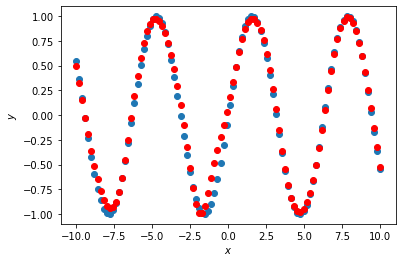

MSE 0.027431154623627663


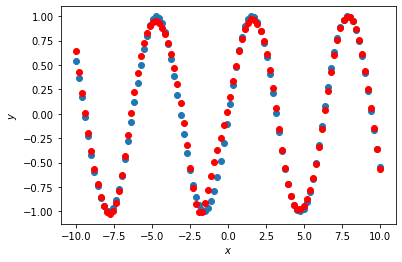

MSE 0.02709338627755642


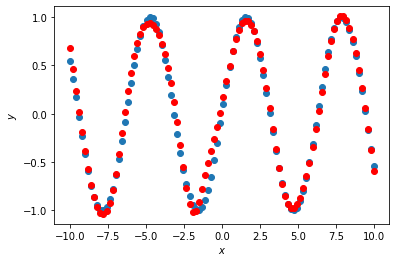

MSE 0.026951543986797333


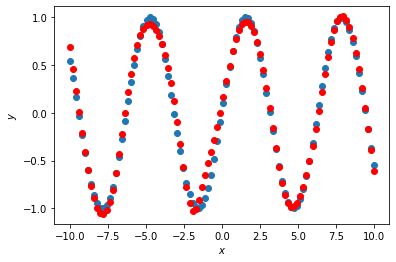

In [5]:
sine_net = SineNet(50)
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

for epoch in range(2000):

    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    y = sine_net.forward(x_validation)

    loss = MSE(y_pred, y_train)

    loss.backward()

    optimizer.step()

    if epoch % 200 == 0:
        print(f'MSE {loss}')
        plt.plot(x_validation.numpy(), y_validation.numpy(), 'o', label='Groud truth')
        plt.plot(x_validation.numpy(), y.data.numpy(), 'o', c='r', label='Prediction')
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.show()

## Построить сеть, предсказывающую следующую функцию:
$y=2^x*sin(2^{-x})$


In [6]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

In [7]:
class RegressionNet(torch.nn.Module):
    
    def __init__(self, n_hidden_neurons):
        super().__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act3 = torch.nn.Tanh()
        self.fc4 = torch.nn.Linear(n_hidden_neurons, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        return x

In [8]:
def predict(net, x, y):
    y_pred = net.forward(x)
    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

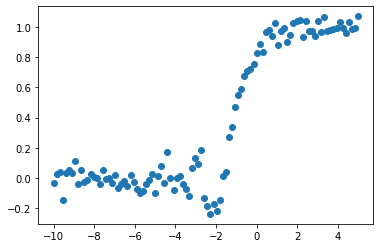

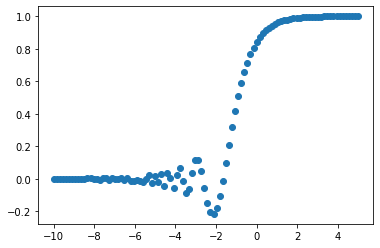

In [9]:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)
x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.show()
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.show()

In [10]:
def loss(pred, target):
    return (pred - target).abs().mean()

Epoch 19900, Train MAE 0.033541858196258545


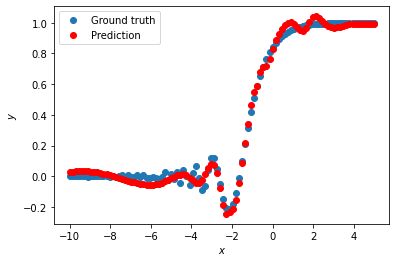

CPU times: user 1min 1s, sys: 1.18 s, total: 1min 2s
Wall time: 1min 2s


In [11]:
%%time
net = RegressionNet(50)
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

for epoch in range(20000):

    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    y = net.forward(x_validation)
    loss_value = loss(y_pred, y_train)
    
    loss_value.backward()
    
    optimizer.step()

    if epoch % 100 == 0:
        clear_output(wait=True)
        print(f'Epoch {epoch}, Train MAE {loss_value.item()}')
        plt.plot(x_validation.numpy(), y_validation.numpy(), 'o', label='Ground truth')
        plt.plot(x_validation.numpy(), y.data.numpy(), 'o', c='r', label='Prediction');
        plt.legend(loc='upper left')
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.show()